In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import glob

In [2]:
files = glob.glob("./data/scan/2212072/*.csv")
print(files)

# file
dfs =[]
sample_names =[]
for file in files[:]:
    dfs.append(pd.read_csv(file, index_col=0))
    sample_names.append(file[-33:-4])

print(sample_names)
dfs[0].head()

['./data/scan/2212072\\2022-12-07-10-25-20_scan_VT2110803.csv']
['12-07-10-25-20_scan_VT2110803']


,Time,humidity,temperature,vpp_sum1,vpp_sum2,delay_slow,delay_fast,delay_pp_slow,delay_pp_fast,Ch1_word,Ch2_word,Ch1_Amp,Ch2_Amp
0,2022/12/07 10:23:54,28.834534,24.494247,488854.0,1007486.0,3802.302898,1161.459185,10.670052,22.149861,1.609346e+15,3.227994e+15,14.7,15.1
1,2022/12/07 10:23:56,28.860474,24.502258,479866.0,1006360.0,3934.444105,1174.417120,22.884379,11.075653,1.609369e+15,3.228041e+15,14.7,15.1
2,2022/12/07 10:23:58,28.845215,24.515610,478508.0,1008333.0,4045.775536,1172.000240,31.066116,9.354118,1.609392e+15,3.228087e+15,14.7,15.1
3,2022/12/07 10:24:00,28.829956,24.488907,472296.0,1007408.0,4146.417518,1167.264068,36.800327,5.481239,1.609415e+15,3.228133e+15,14.7,15.1
4,2022/12/07 10:24:03,28.840637,24.512939,462573.0,1005508.0,4239.872343,1160.581759,39.218723,3.715805,1.609438e+15,3.228179e+15,14.7,15.1


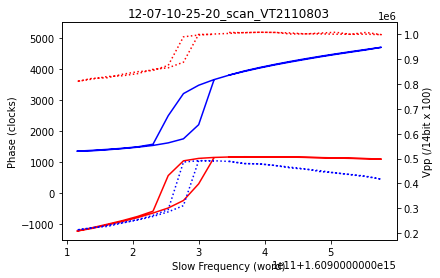

In [3]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Slow Frequency (word)")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Vpp (/14bit x 100)")
plt.title(sample_names[0])

ax1.set_ylim(-1500,5500)


for df in dfs:
    ax1.plot(df["Ch1_word"], df["delay_slow"], color='b')
    ax1.plot(df["Ch1_word"], df["delay_fast"], color='r')
    ax2.plot(df["Ch1_word"], df["vpp_sum1"], color='b', linestyle="dotted")
    ax2.plot(df["Ch1_word"], df["vpp_sum2"], color='r', linestyle="dotted")

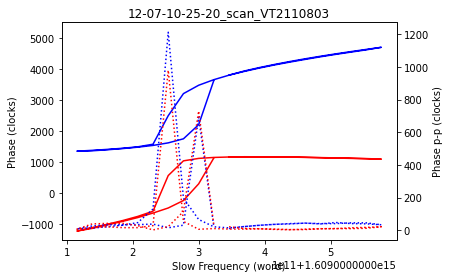

In [4]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Slow Frequency (word)")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Phase p-p (clocks)")
plt.title(sample_names[0])

ax1.set_ylim(-1500,5500)


for df in dfs:
    ax1.plot(df["Ch1_word"], df["delay_slow"], color='b')
    ax1.plot(df["Ch1_word"], df["delay_fast"], color='r')
    ax2.plot(df["Ch1_word"], df["delay_pp_slow"], color='b', linestyle="dotted")
    ax2.plot(df["Ch1_word"], df["delay_pp_fast"], color='r', linestyle="dotted")

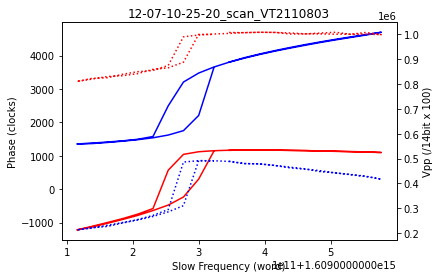

In [5]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Slow Frequency (word)")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Vpp (/14bit x 100)")
plt.title(sample_names[0])


for df in [dfs[0]]:
    ax1.plot(df["Ch1_word"], df["delay_slow"], color='b')
    ax1.plot(df["Ch1_word"], df["delay_fast"], color='r')
    ax2.plot(df["Ch1_word"], df["vpp_sum1"], color='b', linestyle="dotted")
    ax2.plot(df["Ch1_word"], df["vpp_sum2"], color='r', linestyle="dotted")

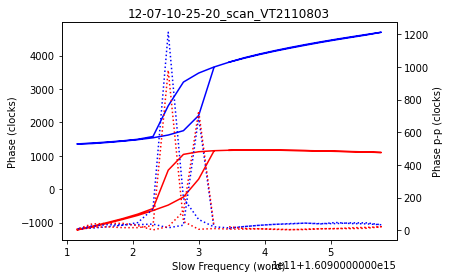

In [6]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Slow Frequency (word)")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Phase p-p (clocks)")
plt.title(sample_names[0])


for df in [dfs[0]]:
    ax1.plot(df["Ch1_word"], df["delay_slow"], color='b')
    ax1.plot(df["Ch1_word"], df["delay_fast"], color='r')
    ax2.plot(df["Ch1_word"], df["delay_pp_slow"], color='b', linestyle="dotted")
    ax2.plot(df["Ch1_word"], df["delay_pp_fast"], color='r', linestyle="dotted")

In [7]:
labels =["25deg", "15deg", "15deg", "35deg", "35deg", "25deg"]

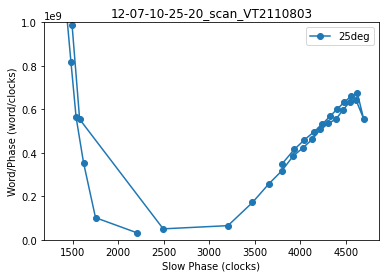

In [8]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Slow Phase (clocks)")
ax1.set_ylabel("Word/Phase (word/clocks)")
plt.title(sample_names[0])

ax1.set_ylim(0,1e9)

for i, df in enumerate(dfs):
    delta_slow = np.array([df["delay_slow"][i+1]-  df["delay_slow"][i] for i in range(len(df)-1)])
    delta_Ch2_word = np.array([df["Ch2_word"][i+1]-  df["Ch2_word"][i] for i in range(len(df)-1)])
    ax1.plot(df["delay_slow"][:-1], delta_Ch2_word/delta_slow, "-o", label=labels[i])
    
ax1.legend()


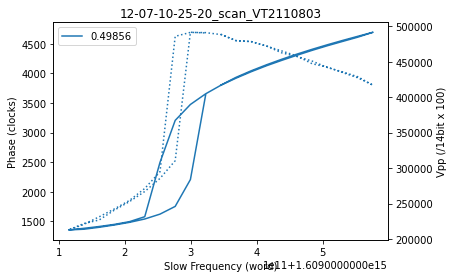

In [9]:
labels =["0.49856", "0.49865", "0.49871", "0.49880"]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Slow Frequency (word)")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Vpp (/14bit x 100)")
plt.title(sample_names[0])

#ax1.set_ylim(-1500,5500)


for i, df in enumerate(dfs[:]):
    ax1.plot(df["Ch1_word"], df["delay_slow"], label=labels[i])
    #ax1.plot(df["Ch1_word"], df["delay_fast"], label=labels[i])
    ax2.plot(df["Ch1_word"], df["vpp_sum1"],linestyle="dotted", label=labels[i])
    #ax2.plot(df["Ch1_word"], df["vpp_sum2"], label=labels[i], linestyle="dotted")
    
ax1.legend()

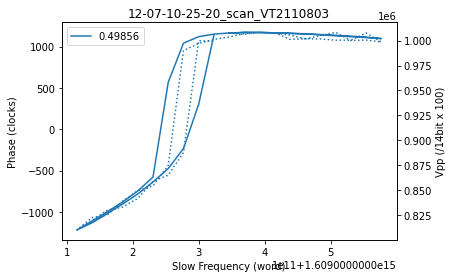

In [10]:
labels =["0.49856", "0.49865", "0.49871", "0.49880"]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Slow Frequency (word)")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Vpp (/14bit x 100)")
plt.title(sample_names[0])

#ax1.set_ylim(-1500,5500)


for i, df in enumerate(dfs[:]):
    #ax1.plot(df["Ch1_word"], df["delay_slow"], label=labels[i])
    ax1.plot(df["Ch1_word"], df["delay_fast"], label=labels[i])
    #ax2.plot(df["Ch1_word"], df["vpp_sum1"],linestyle="dotted", label=labels[i])
    ax2.plot(df["Ch1_word"], df["vpp_sum2"], label=labels[i], linestyle="dotted")
    
ax1.legend()

IndexError: list index out of range

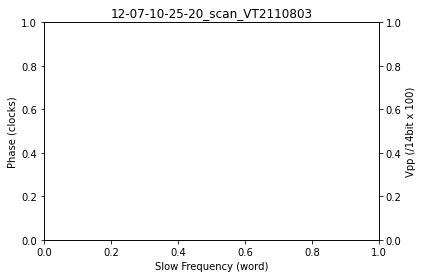

In [11]:
labels =["0.49850"]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Slow Frequency (word)")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Vpp (/14bit x 100)")
plt.title(sample_names[0])

#ax1.set_ylim(-1500,5500)


for i, df in enumerate([dfs[2]]):
    #ax1.plot(df["Ch1_word"], df["delay_slow"], label=labels[i])
    ax1.plot(df["Ch1_word"], df["delay_fast"], label=labels[i])
    #ax2.plot(df["Ch1_word"], df["vpp_sum1"],linestyle="dotted", label=labels[i])
    ax2.plot(df["Ch1_word"], df["vpp_sum2"], label=labels[i], linestyle="dotted")
    
ax1.legend()

In [ ]:
labels =["0.49850"]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Slow Frequency (word)")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Vpp (/14bit x 100)")
plt.title(sample_names[0])

#ax1.set_ylim(-1500,5500)


for i, df in enumerate([dfs[2]]):
    ax1.plot(df["Ch1_word"], df["delay_slow"], label=labels[i])
    #ax1.plot(df["Ch1_word"], df["delay_fast"], label=labels[i])
    ax2.plot(df["Ch1_word"], df["vpp_sum1"],linestyle="dotted", label=labels[i])
    #ax2.plot(df["Ch1_word"], df["vpp_sum2"], label=labels[i], linestyle="dotted")
    
ax1.legend()